<a href="https://colab.research.google.com/github/harodjoseph/TUGASPYTHON/blob/main/HarodJoseph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd /content/drive/MyDrive/CNNDUA

/content/drive/MyDrive/CNNDUA


In [3]:
ls

GMB_01/  GMB_03/  GMB_04/  GMB_05/  GMB_06/


In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [12]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [13]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((240, 240))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [14]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [15]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [16]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [17]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(444, 240, 240, 3)
(148, 240, 240, 3)


In [18]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(240,240,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 117, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 58, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [19]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(240*240*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 172800)            0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               17280100  
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 17,282,039
Trainable params: 17,282,039
Non-trainable params: 0
_________________________________________________________________


In [21]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [22]:
H = model1.fit(trainX, trainY, validation_data=(testX,testY), epochs=25,batch_size=32)

Epoch 1/25
14/14 [==============================] - 13s 952ms/step - loss: 1.5694 - accuracy: 0.2995 - val_loss: 1.4358 - val_accuracy: 0.4392
Epoch 2/25
14/14 [==============================] - 13s 953ms/step - loss: 1.2430 - accuracy: 0.5428 - val_loss: 1.2789 - val_accuracy: 0.4189
Epoch 3/25
14/14 [==============================] - 13s 953ms/step - loss: 1.0005 - accuracy: 0.6419 - val_loss: 1.0241 - val_accuracy: 0.6486
Epoch 4/25
14/14 [==============================] - 13s 947ms/step - loss: 0.7341 - accuracy: 0.7342 - val_loss: 0.8395 - val_accuracy: 0.7365
Epoch 5/25
14/14 [==============================] - 13s 949ms/step - loss: 0.5173 - accuracy: 0.8266 - val_loss: 0.8558 - val_accuracy: 0.6824
Epoch 6/25
14/14 [==============================] - 13s 944ms/step - loss: 0.4034 - accuracy: 0.8716 - val_loss: 0.7409 - val_accuracy: 0.7568
Epoch 7/25
14/14 [==============================] - 13s 947ms/step - loss: 0.2462 - accuracy: 0.9122 - val_loss: 0.7727 - val_accuracy: 0.7568

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


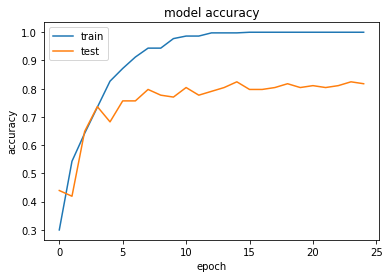

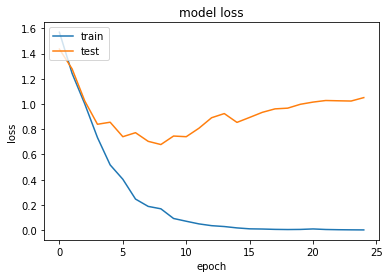

In [23]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.75      0.78      0.76        27
      GMB_03       0.82      0.78      0.80        36
      GMB_04       0.89      0.89      0.89        27
      GMB_05       0.90      0.93      0.92        29
      GMB_06       0.72      0.72      0.72        29

    accuracy                           0.82       148
   macro avg       0.82      0.82      0.82       148
weighted avg       0.82      0.82      0.82       148



In [25]:
model.save('nnmodel_daun')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_daun/assets
